In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('B_NoisySet')
df=df.drop(df.columns[[0]] , 1)
df

,STD_Months,0.1_TypoB,0.2_TypoB,0.3_TypoB,0.4_TypoB,0.5_TypoB,0.6_TypoB,0.7_TypoB
0,September,Septmber,Sepembr,Setemr,Stemb,Setr,etee,pbe
1,January,Janary,Jnuary,Jnary,auar,nuy,Jar,au
2,April,Apri,Apri,Arl,Api,Al,Al,A
3,March,Mach,Mach,Mch,ach,ah,Mh,h
4,September,Septmber,Sepeber,ptmber,Sepmb,Stmr,Setb,eee
5,April,Apri,Apil,prl,Arl,pl,Ai,A
6,December,Decembr,ecembr,Deeber,Deeer,Demr,cem,cb
7,November,Nvember,Novebr,Novebe,vemer,Nemb,Nme,ve
8,January,Januar,Januay,Janur,nuay,Jay,Jay,ua
9,March,Mach,Marh,Mar,rch,rh,Mh,r


In [3]:
#Levenshtein Distance    
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November" ,"December"   ] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_LD'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            ld_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                ld = jellyfish.levenshtein_distance(s1 , s2)
                print("LD :" , ld)
                if ld < ld_best:
                    ld_best = ld
                    best_match = s2
                df[col+'_LD'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("ld_best: " , ld_best)        
            print("*******")       

0.1_TypoB
row:  0
s1:  Septmber
s2:  January
LD : 8


s1:  Septmber
s2:  February
LD : 7


s1:  Septmber
s2:  March
LD : 8


s1:  Septmber
s2:  April
LD : 7


s1:  Septmber
s2:  May
LD : 8


s1:  Septmber
s2:  June
LD : 7


s1:  Septmber
s2:  July
LD : 8


s1:  Septmber
s2:  August
LD : 8


s1:  Septmber
s2:  September
LD : 1


s1:  Septmber
s2:  October
LD : 4


s1:  Septmber
s2:  November
LD : 4


s1:  Septmber
s2:  December
LD : 3


Best Match:  September
ld_best:  1
*******
row:  1
s1:  Janary
s2:  January
LD : 1


s1:  Janary
s2:  February
LD : 5


s1:  Janary
s2:  March
LD : 5


s1:  Janary
s2:  April
LD : 6


s1:  Janary
s2:  May
LD : 4


s1:  Janary
s2:  June
LD : 4


s1:  Janary
s2:  July
LD : 4


s1:  Janary
s2:  August
LD : 6


s1:  Janary
s2:  September
LD : 9


s1:  Janary
s2:  October
LD : 7


s1:  Janary
s2:  November
LD : 8


s1:  Janary
s2:  December
LD : 8


Best Match:  January
ld_best:  1
*******
row:  2
s1:  Apri
s2:  January
LD : 6


s1:  Apri
s2:  February
LD : 7

In [4]:
df

,STD_Months,0.1_TypoB,0.2_TypoB,0.3_TypoB,0.4_TypoB,0.5_TypoB,0.6_TypoB,0.7_TypoB,0.1_TypoB_LD,0.2_TypoB_LD,0.3_TypoB_LD,0.4_TypoB_LD,0.5_TypoB_LD,0.6_TypoB_LD,0.7_TypoB_LD
0,September,Septmber,Sepembr,Setemr,Stemb,Setr,etee,pbe,September,September,September,September,May,June,May
1,January,Janary,Jnuary,Jnary,auar,nuy,Jar,au,January,January,January,January,May,May,May
2,April,Apri,Apri,Arl,Api,Al,Al,A,April,April,April,April,April,April,May
3,March,Mach,Mach,Mch,ach,ah,Mh,h,March,March,March,March,May,May,May
4,September,Septmber,Sepeber,ptmber,Sepmb,Stmr,Setb,eee,September,September,September,September,May,May,May
5,April,Apri,Apil,prl,Arl,pl,Ai,A,April,April,April,April,April,April,May
6,December,Decembr,ecembr,Deeber,Deeer,Demr,cem,cb,December,December,December,December,May,May,May
7,November,Nvember,Novebr,Novebe,vemer,Nemb,Nme,ve,November,November,November,November,May,May,May
8,January,Januar,Januay,Janur,nuay,Jay,Jay,ua,January,January,January,May,May,May,May
9,March,Mach,Marh,Mar,rch,rh,Mh,r,March,March,May,March,March,May,May


In [5]:
#Levenshtein Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
LdAccuracy = []
for x in NameOfColumns:
    if "LD" in x:
        print("LD Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        LdAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(LdAccuracy)

LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  0.975
LD Accuracy :  0.75
LD Accuracy :  0.35
LD Accuracy :  0.291666666667
LD Accuracy :  0.0833333333333
[1.0, 1.0, 0.97499999999999998, 0.75, 0.34999999999999998, 0.29166666666666669, 0.083333333333333329]


In [6]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 ]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_TypoB_LD'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_TypoB_LD'].iat[x]
diff

,Original,Transformation_0.1,Transformation_0.2,Transformation_0.3,Transformation_0.4,Transformation_0.5,Transformation_0.6,Transformation_0.7
0,September,,,,,May,June,May
1,January,,,,,May,May,May
2,April,,,,,,,May
3,March,,,,,May,May,May
4,September,,,,,May,May,May
5,April,,,,,,,May
6,December,,,,,May,May,May
7,November,,,,,May,May,May
8,January,,,,May,May,May,May
9,March,,,May,,,May,May


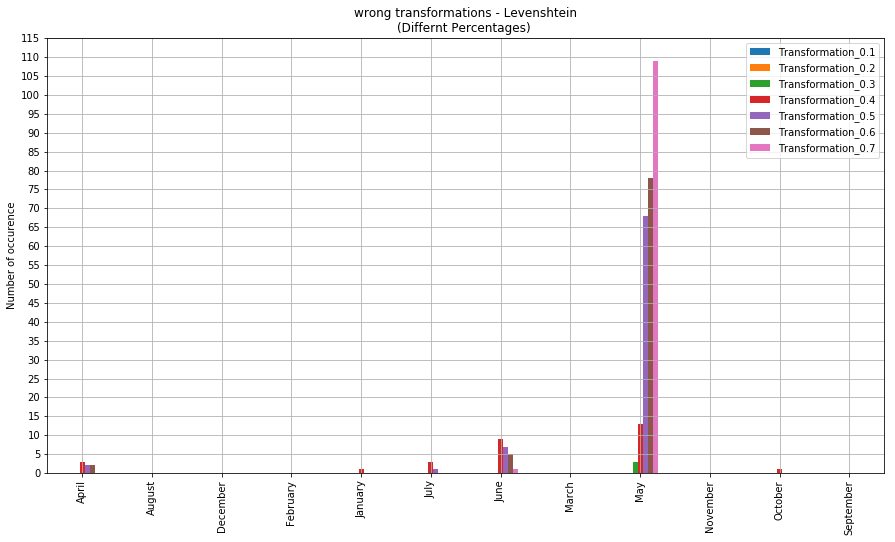

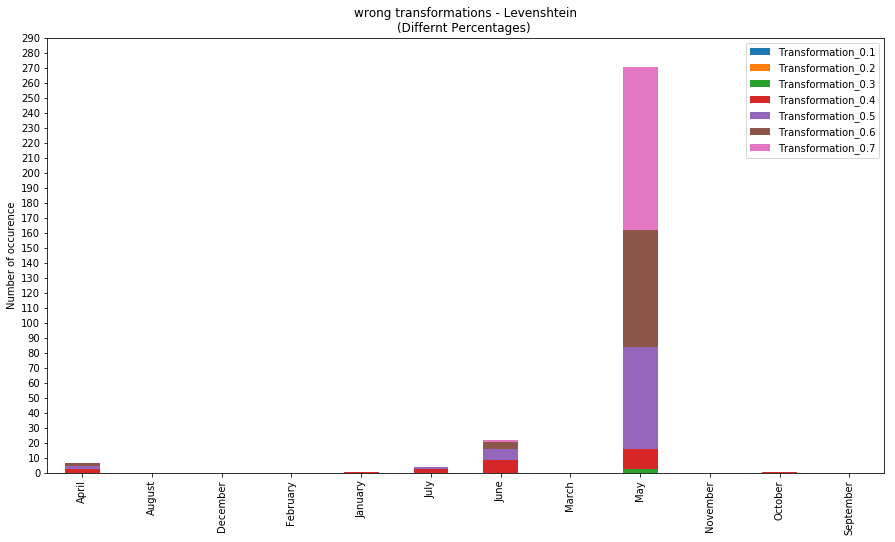

In [7]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong.plot.bar(figsize=(15, 8))
plt.yticks(range(0 , 120 ,5))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 300 ,10))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.show()

In [8]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,500) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''

per = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 ]
#Iterate ove the transformed columns 
for p in per:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoB_LD'])
    
    if(len(c[0])>0):
        print(str(p) + '_TypoB')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_TypoB'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

0.3_TypoB
March To May
Noisy form: Mar


March To May
Noisy form: Mar


March To May
Noisy form: Mah


********
0.4_TypoB
January To May
Noisy form: nuay


October To June
Noisy form: tobe


September To June
Noisy form: Stmer


January To May
Noisy form: Jany


January To May
Noisy form: Jary


January To May
Noisy form: Jany


September To June
Noisy form: Stmbe


July To May
Noisy form: Jy


July To May
Noisy form: uy


January To July
Noisy form: Jury


January To July
Noisy form: Jury


October To June
Noisy form: Ocoe


March To May
Noisy form: Mar


October To June
Noisy form: Ocoe


January To May
Noisy form: Jary


December To October
Noisy form: ceber


February To January
Noisy form: buary


July To June
Noisy form: Ju


March To May
Noisy form: Mac


July To June
Noisy form: Ju


July To May
Noisy form: ly


March To May
Noisy form: Mah


October To June
Noisy form: Oobe


July To May
Noisy form: Jy


September To April
Noisy form: epebe


July To May
Noisy form: ly


Septe

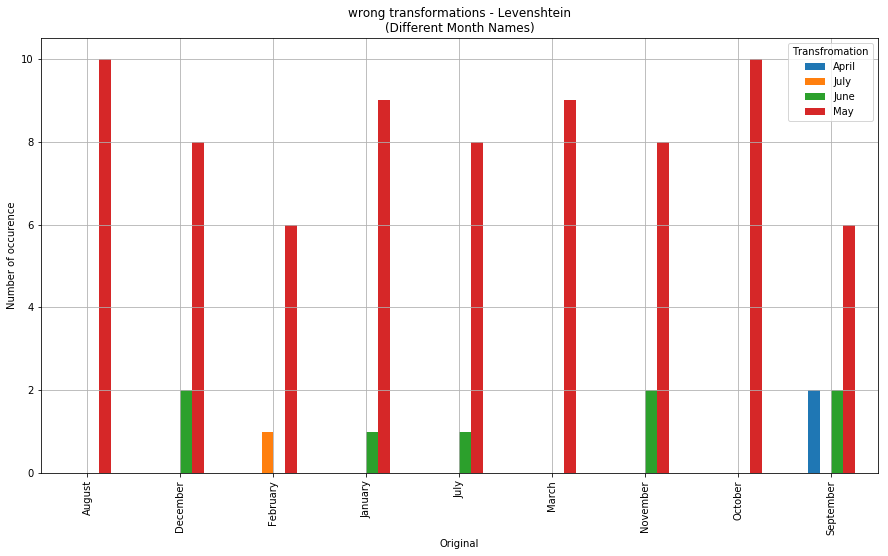

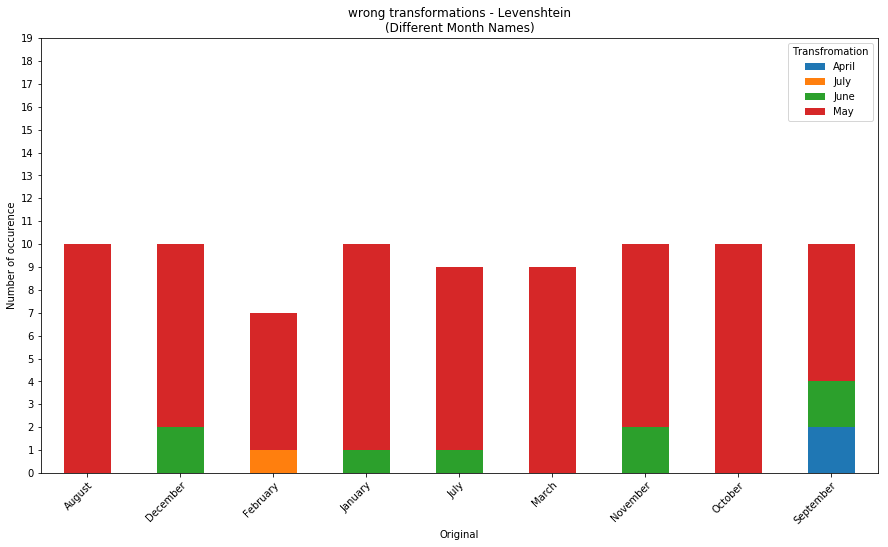

In [9]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.show()

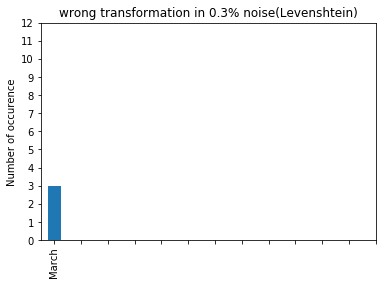

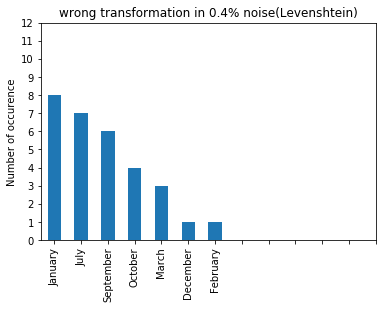

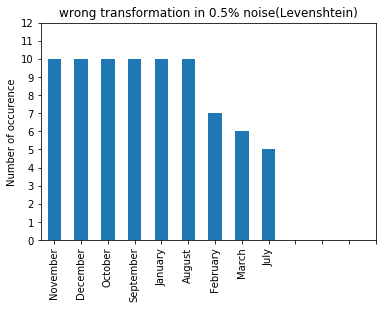

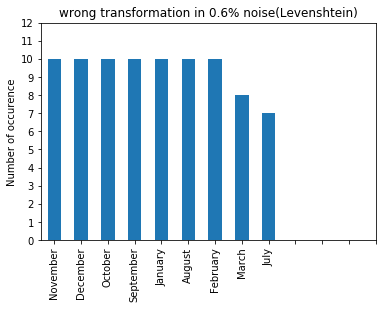

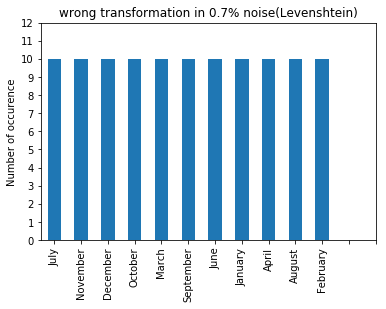

In [10]:
import numpy as np

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoB_LD'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_TypoB'] = ''
    
    if(len(c[0]>0)):        
        for x in np.nditer(c):
            x = int(x)
            diff['Original'].iat[x] = df['STD_Months'].iat[x]
            diff[str(p) + '_TypoB'].iat[x] = df[str(p) + '_TypoB'].iat[x]
            diff['Transformation'].iat[x] = df[str(p) + '_TypoB_LD'].iat[x]
        diff.dropna()
        wrongTransform = diff['Original'].value_counts()
        wrongTransform.plot.bar()
        plt.yticks(range(0 , 13))
        plt.ylabel('Number of occurence')
        plt.title('wrong transformation in {}% noise(Levenshtein)'.format(p))
        plt.xticks(range(0,13))
        plt.show() 

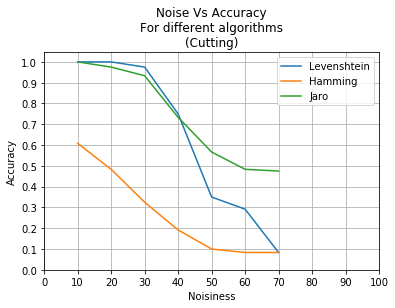

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
x = [10,20,30,40,50,60,70]
yLD=LdAccuracy
yHamming=[0.60833333333333328, 0.48333333333333334, 0.32500000000000001, 0.19166666666666668, 0.10000000000000001, 0.083333333333333329, 0.083333333333333329]
yJaro=[1.0, 0.97499999999999998, 0.93333333333333335, 0.73333333333333328, 0.56666666666666665, 0.48333333333333334, 0.47499999999999998]
plt.plot(x,yLD , label = 'Levenshtein')
plt.plot(x,yHamming , label = 'Hamming')
plt.plot(x,yJaro , label = 'Jaro')
#Add title and label
plt.xlabel('Noisiness')
plt.ylabel('Accuracy')
plt.title('Noise Vs Accuracy\nFor different algorithms\n(Cutting)')
plt.xticks(np.arange(0 , 110 , 10))
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.legend()
plt.grid()
plt.show()